## Demand Analysis

In [1]:
import pandas as pd

/Users/nyogeesh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel('Analysis.xlsx')

In [3]:
df.head()

,Order Date,Item Code,Short Desc of Item,Order Quantity,Order Unit,Location
0,2023-07-31,0008A0049,"""BRG.BALL,SINGLE ROW,DEEP GROOVE,6203""",15.0,NOS,Jamshedpur
1,2023-04-05,0008A0051,"""BRG.BALL,6205/61903 HLU""",2.0,NOS,Jamshedpur
2,2023-04-05,0008A0098,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",9.0,NOS,Jamshedpur
3,2023-07-05,0008A0098,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",5.0,NOS,Jamshedpur
4,2023-10-06,0008A0098,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",5.0,NOS,Jamshedpur


In [4]:
df.columns

Index(['Order Date', 'Item Code', 'Short Desc of Item', 'Order Quantity',
       'Order Unit', 'Location'],
      dtype='object')

In [5]:
# Group by Item Code and Location, and count the number of occurrences (demand frequency)
demand_frequency = df.groupby(['Item Code', 'Location','Short Desc of Item']).size().reset_index(name='Demand Frequency')
demand_frequency

,Item Code,Location,Short Desc of Item,Demand Frequency
0,0008A0049,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GROOVE,6203""",1
1,0008A0051,Jamshedpur,"""BRG.BALL,6205/61903 HLU""",1
2,0008A0098,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",13
3,0008A0133,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO6308,ZZC3",11
4,0008A0141,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO6309,ZZC3",6
...,...,...,...,...
5788,6158A0114,Meramandali,SPL LIFTNG TOOL;STRAPPING BELT WITH RATC,2
5789,6158A0115,Meramandali,SPL LIFTNG TOOL;STRAPPING BELT WITH RATC,2
5790,6158A0566,Meramandali,SPL LIFTNG TOOL;VERTICAL DRUM LIFTING TA,1
5791,6200Y0003,Meramandali,PORTABLE GRINDING MA;ELECTRIC POWER ANG,3


In [6]:
# Group by Item Code and Location, and sum the Order Quantity
demand_volume = df.groupby(['Item Code', 'Location','Short Desc of Item'])['Order Quantity'].sum().reset_index(name='Demand Volume')
demand_volume

,Item Code,Location,Short Desc of Item,Demand Volume
0,0008A0049,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GROOVE,6203""",15.0
1,0008A0051,Jamshedpur,"""BRG.BALL,6205/61903 HLU""",2.0
2,0008A0098,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",91.0
3,0008A0133,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO6308,ZZC3",172.0
4,0008A0141,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO6309,ZZC3",86.0
...,...,...,...,...
5788,6158A0114,Meramandali,SPL LIFTNG TOOL;STRAPPING BELT WITH RATC,645.0
5789,6158A0115,Meramandali,SPL LIFTNG TOOL;STRAPPING BELT WITH RATC,2201.0
5790,6158A0566,Meramandali,SPL LIFTNG TOOL;VERTICAL DRUM LIFTING TA,2.0
5791,6200Y0003,Meramandali,PORTABLE GRINDING MA;ELECTRIC POWER ANG,52.0


In [7]:
# Merge demand frequency and volume data on Item Code and Location
demand_analysis = pd.merge(demand_frequency, demand_volume, on=['Item Code', 'Location'])
demand_analysis = demand_analysis.drop(columns = ['Short Desc of Item_y'], axis = 1)
demand_analysis

,Item Code,Location,Short Desc of Item_x,Demand Frequency,Demand Volume
0,0008A0049,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GROOVE,6203""",1,15.0
1,0008A0051,Jamshedpur,"""BRG.BALL,6205/61903 HLU""",1,2.0
2,0008A0098,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",13,91.0
3,0008A0133,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO6308,ZZC3",11,172.0
4,0008A0141,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO6309,ZZC3",6,86.0
...,...,...,...,...,...
6390,6158A0114,Meramandali,SPL LIFTNG TOOL;STRAPPING BELT WITH RATC,2,645.0
6391,6158A0115,Meramandali,SPL LIFTNG TOOL;STRAPPING BELT WITH RATC,2,2201.0
6392,6158A0566,Meramandali,SPL LIFTNG TOOL;VERTICAL DRUM LIFTING TA,1,2.0
6393,6200Y0003,Meramandali,PORTABLE GRINDING MA;ELECTRIC POWER ANG,3,52.0


In [8]:
# Aggregate demand frequency across all locations
overall_demand_frequency = demand_analysis.groupby(['Item Code','Location','Short Desc of Item_x'])['Demand Frequency'].sum().reset_index()

# Aggregate demand volume across all locations
overall_demand_volume = demand_analysis.groupby(['Item Code','Location','Short Desc of Item_x'])['Demand Volume'].sum().reset_index()

# Combine overall frequency and volume into a single DataFrame
overall_demand_analysis = pd.merge(overall_demand_frequency, overall_demand_volume, on='Item Code')
overall_demand_analysis = overall_demand_analysis.drop(columns = ['Short Desc of Item_x_y','Location_y'])
overall_demand_analysis

,Item Code,Location_x,Short Desc of Item_x_x,Demand Frequency,Demand Volume
0,0008A0049,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GROOVE,6203""",1,15.0
1,0008A0051,Jamshedpur,"""BRG.BALL,6205/61903 HLU""",1,2.0
2,0008A0098,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",13,91.0
3,0008A0133,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO6308,ZZC3",11,172.0
4,0008A0141,Jamshedpur,"""BRG.BALL,SINGLE ROW,DEEP GRO6309,ZZC3",6,86.0
...,...,...,...,...,...
7616,6158A0114,Meramandali,SPL LIFTNG TOOL;STRAPPING BELT WITH RATC,2,645.0
7617,6158A0115,Meramandali,SPL LIFTNG TOOL;STRAPPING BELT WITH RATC,2,2201.0
7618,6158A0566,Meramandali,SPL LIFTNG TOOL;VERTICAL DRUM LIFTING TA,1,2.0
7619,6200Y0003,Meramandali,PORTABLE GRINDING MA;ELECTRIC POWER ANG,3,52.0


In [9]:
# Specify the file name (it will be saved in the current working directory)
output_file_name = 'demand_analysis.xlsx'

# Write the demand_analysis DataFrame to an Excel file in the current working directory
demand_analysis.to_excel(output_file_name, index=False)

print(f"Demand analysis has been successfully saved to {output_file_name} in the current working directory.")

Demand analysis has been successfully saved to demand_analysis.xlsx in the current working directory.


/Users/nyogeesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


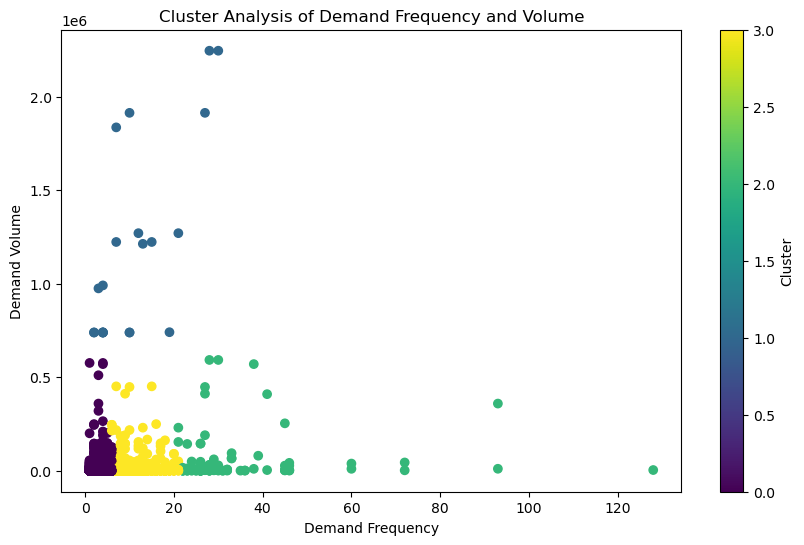

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the relevant columns for clustering
data_for_clustering = overall_demand_analysis[['Demand Frequency', 'Demand Volume']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
overall_demand_analysis['Cluster'] = clusters

# Save the DataFrame with cluster labels to an Excel file
df.to_excel('demand_analysis_with_clusters.xlsx', index=False)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(overall_demand_analysis['Demand Frequency'], overall_demand_analysis['Demand Volume'], c=overall_demand_analysis['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Demand Frequency')
plt.ylabel('Demand Volume')
plt.title('Cluster Analysis of Demand Frequency and Volume')
plt.colorbar(label='Cluster')
plt.show()

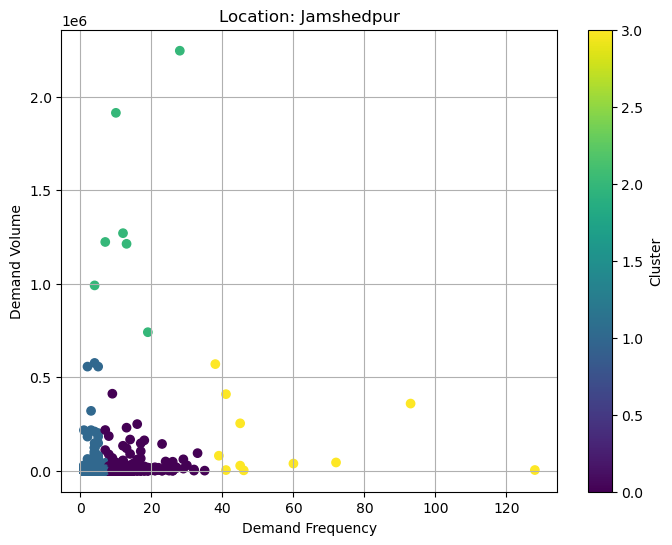

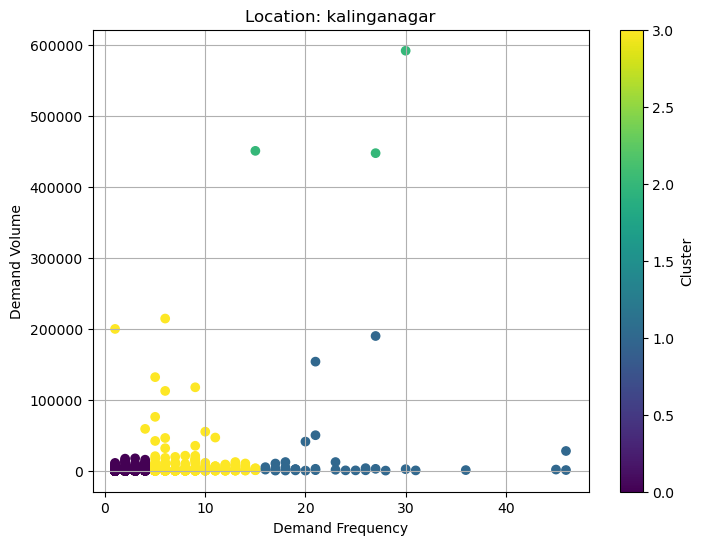

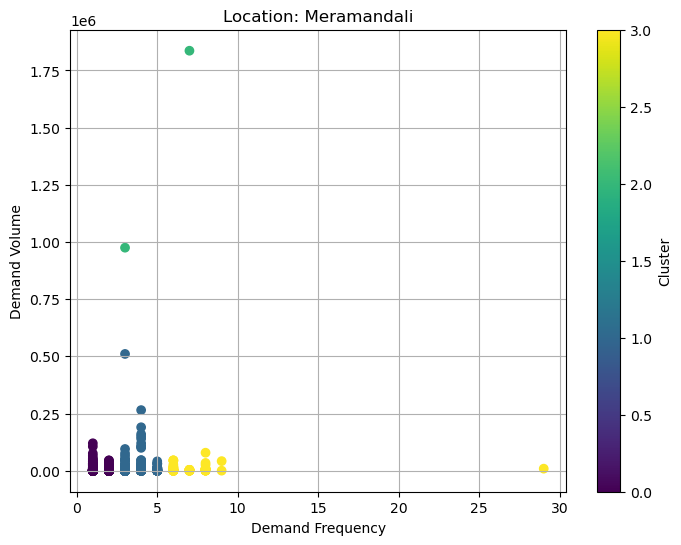

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
demand_analysis = pd.read_excel('demand_analysis.xlsx')

# List to hold results for each location
results = []

# Get unique locations
locations = demand_analysis['Location'].unique()

# Perform clustering for each location
for location in locations:
    # Filter data for the current location
    location_data = demand_analysis[demand_analysis['Location'] == location].copy()
    
    # Extract relevant columns for clustering
    data_for_clustering = location_data[['Demand Frequency', 'Demand Volume']]
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Set n_init explicitly
    clusters = kmeans.fit_predict(scaled_data)
    
    # Add cluster labels to the location data
    location_data.loc[:, 'Cluster'] = clusters  # Use .loc to avoid SettingWithCopyWarning
    
    # Append results to the list
    results.append(location_data)
    
    # Save individual plot for the current location
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(location_data['Demand Frequency'], location_data['Demand Volume'], c=location_data['Cluster'], cmap='viridis', marker='o')
    plt.title(f'Location: {location}')
    plt.xlabel('Demand Frequency')
    plt.ylabel('Demand Volume')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.show()
    plt.savefig(f'demand_analysis_{location}_clusters.png')  # Save each plot as an image file
    plt.close()  # Close the figure to avoid displaying it inline
    

# Combine results into a single DataFrame
combined_results = pd.concat(results)

# Save the DataFrame with cluster labels to an Excel file
combined_results.to_excel('demand_analysis_with_clusters_by_location.xlsx', index=False)

## Number of Warehouses and Location Analysis

/Users/nyogeesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


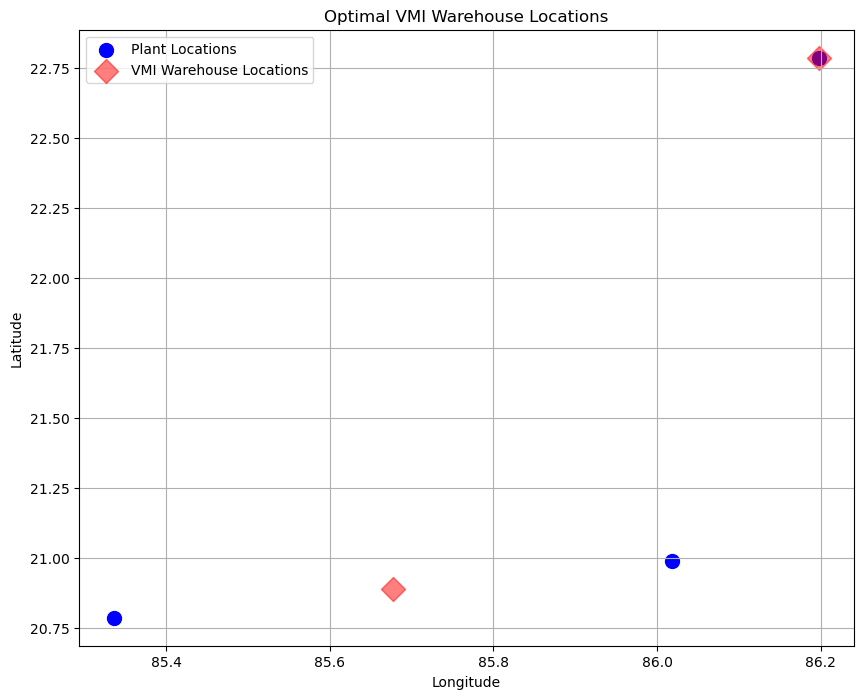

Proposed VMI Warehouse Locations (Latitude, Longitude):
VMI Warehouse 1: 22.78801, 86.19805
VMI Warehouse 2: 20.88680, 85.67705


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Plant locations (latitude and longitude) - these are also your demand points
plant_locations = np.array([
    [20.78551, 85.33628],  # Meramandali
    [20.98810, 86.01783],  # Kalinganar
    [22.78801, 86.19805],  # Jamshedpur
])

# Number of VMI warehouses you want to establish
num_warehouses = 2  # Adjust based on your analysis

# Apply K-means clustering to find optimal warehouse locations
kmeans = KMeans(n_clusters=num_warehouses, random_state=42)
kmeans.fit(plant_locations)

# Get the cluster centers (potential VMI warehouse locations)
warehouse_locations = kmeans.cluster_centers_

# Plot the results with transparency
plt.figure(figsize=(10, 8))

# Plot plant/demand locations with transparency
plt.scatter(plant_locations[:, 1], plant_locations[:, 0], color='blue', label='Plant Locations', marker='o', s=100, alpha=1)

# Plot proposed warehouse locations with transparency
plt.scatter(warehouse_locations[:, 1], warehouse_locations[:, 0], color='red', label='VMI Warehouse Locations', marker='D', s=150, alpha=0.5)

plt.title('Optimal VMI Warehouse Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

# Display warehouse coordinates
print("Proposed VMI Warehouse Locations (Latitude, Longitude):")
for i, loc in enumerate(warehouse_locations):
    print(f"VMI Warehouse {i + 1}: {loc[0]:.5f}, {loc[1]:.5f}")

/Users/nyogeesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


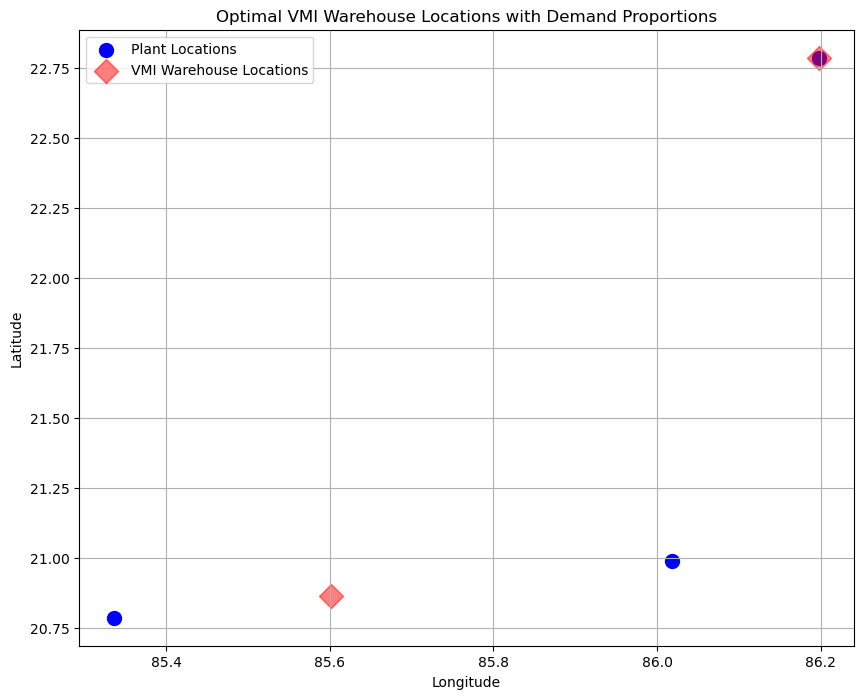

Proposed VMI Warehouse Locations (Latitude, Longitude):
VMI Warehouse 1: 22.78801, 86.19805
VMI Warehouse 2: 20.86429, 85.60133


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Plant locations (latitude and longitude)
plant_locations = np.array([
    [20.78551, 85.33628],  # Meramandali
    [20.98810, 86.01783],  # Kalinganagar
    [22.78801, 86.19805],  # Jamshedpur
])

# Proportions of demand at each location
demand_proportions = np.array([0.22, 0.14, 0.64])  # Meramandali, Kalinganagar, Jamshedpur

# Adjust plant locations by replicating them according to their demand proportions
# The replication factor here is based on the proportion (rounded to the nearest integer)
weighted_plant_locations = np.repeat(plant_locations, (demand_proportions * 100).astype(int), axis=0)

# Number of VMI warehouses you want to establish
num_warehouses = 2  # Adjust based on your analysis

# Apply K-means clustering to find optimal warehouse locations
kmeans = KMeans(n_clusters=num_warehouses, random_state=42)
kmeans.fit(weighted_plant_locations)

# Get the cluster centers (potential VMI warehouse locations)
warehouse_locations = kmeans.cluster_centers_

# Plot the results with transparency
plt.figure(figsize=(10, 8))

# Plot original plant/demand locations
plt.scatter(plant_locations[:, 1], plant_locations[:, 0], color='blue', label='Plant Locations', marker='o', s=100, alpha=1)

# Plot proposed warehouse locations with transparency
plt.scatter(warehouse_locations[:, 1], warehouse_locations[:, 0], color='red', label='VMI Warehouse Locations', marker='D', s=150, alpha=0.5)

plt.title('Optimal VMI Warehouse Locations with Demand Proportions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

# Display warehouse coordinates
print("Proposed VMI Warehouse Locations (Latitude, Longitude):")
for i, loc in enumerate(warehouse_locations):
    print(f"VMI Warehouse {i + 1}: {loc[0]:.5f}, {loc[1]:.5f}")


/Users/nyogeesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nyogeesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nyogeesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nyogeesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/fol

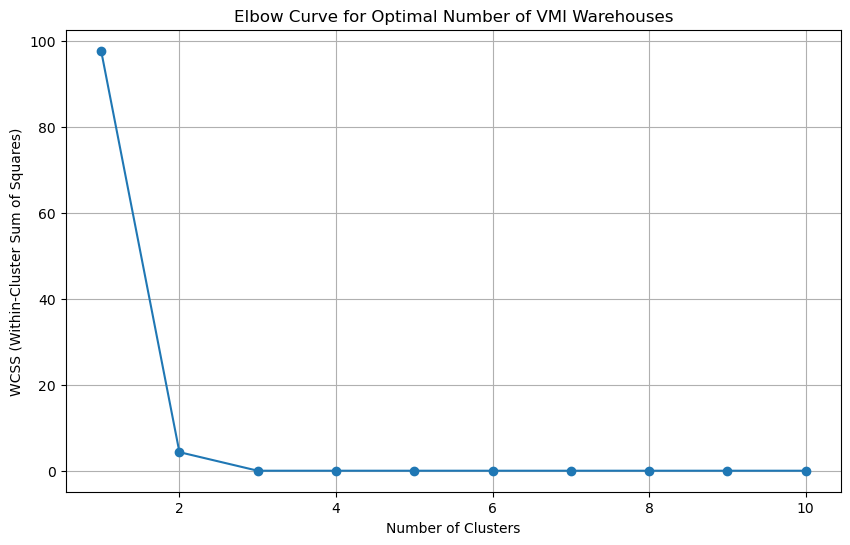

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Plant locations (latitude and longitude)
plant_locations = np.array([
    [20.78551, 85.33628],  # Meramandali
    [20.98810, 86.01783],  # Kalinganagar
    [22.78801, 86.19805],  # Jamshedpur
])

# Proportions of demand at each location
demand_proportions = np.array([0.22, 0.14, 0.64])  # Meramandali, Kalinganagar, Jamshedpur

# Adjust plant locations by replicating them according to their demand proportions
weighted_plant_locations = np.repeat(plant_locations, (demand_proportions * 100).astype(int), axis=0)

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(weighted_plant_locations)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Curve for Optimal Number of VMI Warehouses')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


/Users/nyogeesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


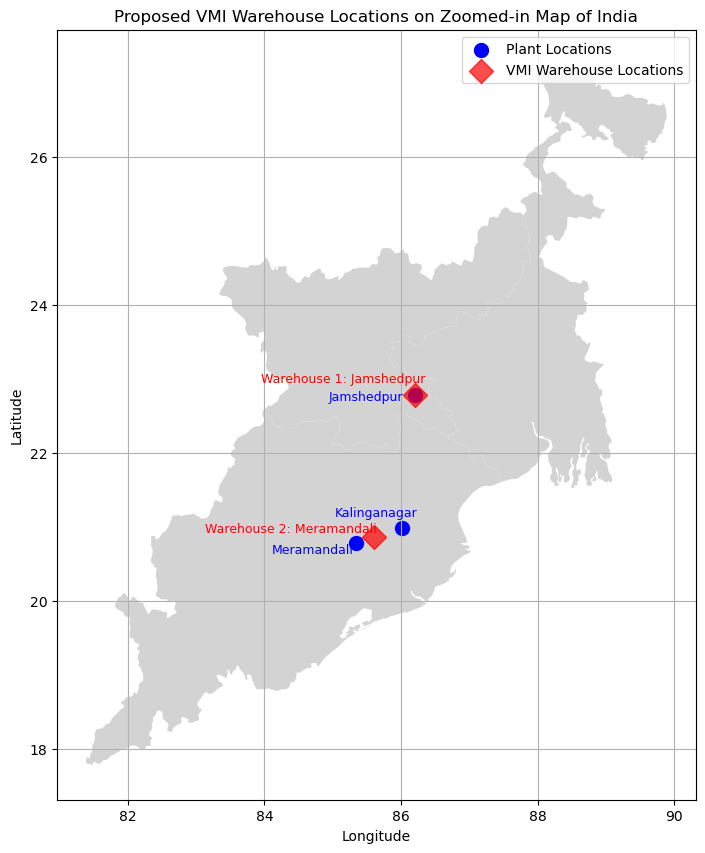

Proposed VMI Warehouse Locations (Latitude, Longitude):
VMI Warehouse 1 (Jamshedpur): 22.78801, 86.19805
VMI Warehouse 2 (Meramandali): 20.86429, 85.60133


In [15]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from adjustText import adjust_text
from scipy.spatial import cKDTree

# Plant locations (latitude and longitude) with names
plant_locations = np.array([
    [20.78551, 85.33628],  # Meramandali
    [20.98810, 86.01783],  # Kalinganagar
    [22.78801, 86.19805],  # Jamshedpur
])
plant_names = ['Meramandali', 'Kalinganagar', 'Jamshedpur']

# Proportions of demand at each location
demand_proportions = np.array([0.22, 0.14, 0.64])  # Meramandali, Kalinganagar, Jamshedpur

# Adjust plant locations by replicating them according to their demand proportions
weighted_plant_locations = np.repeat(plant_locations, (demand_proportions * 100).astype(int), axis=0)

# Number of VMI warehouses you want to establish
num_warehouses = 2  # Adjust based on your analysis

# Apply K-means clustering to find optimal warehouse locations
kmeans = KMeans(n_clusters=num_warehouses, random_state=42)
kmeans.fit(weighted_plant_locations)

# Get the cluster centers (potential VMI warehouse locations)
warehouse_locations = kmeans.cluster_centers_

# Find nearest plant location names for each warehouse location
tree = cKDTree(plant_locations)
_, indices = tree.query(warehouse_locations, k=1)
warehouse_names = [plant_names[i] for i in indices]

# Load the shapefile for India
shapefile_path = 'naturalearth_india_adm1.shp'  # Replace with the correct path to your shapefile

# Ensure the shapefile exists
import os
if not os.path.isfile(shapefile_path):
    raise FileNotFoundError(f"Shapefile not found: {shapefile_path}")

india_map = gpd.read_file(shapefile_path)

# Define bounding box around your points
lat_min, lat_max = plant_locations[:, 0].min() - 0.5, plant_locations[:, 0].max() + 0.5
lon_min, lon_max = plant_locations[:, 1].min() - 0.5, plant_locations[:, 1].max() + 0.5

# Filter the map to include only the bounding box area
india_map = india_map.cx[lon_min:lon_max, lat_min:lat_max]

# Plot the Indian map with zoomed-in view
fig, ax = plt.subplots(figsize=(10, 10))
india_map.plot(ax=ax, color='lightgrey')

# Plot plant locations
ax.scatter(plant_locations[:, 1], plant_locations[:, 0], color='blue', label='Plant Locations', marker='o', s=100, alpha=1)

# Annotate plant locations
texts = [ax.text(lon, lat, name, fontsize=9, ha='right', color='blue') for name, (lat, lon) in zip(plant_names, plant_locations)]

# Plot proposed warehouse locations
ax.scatter(warehouse_locations[:, 1], warehouse_locations[:, 0], color='red', label='VMI Warehouse Locations', marker='D', s=150, alpha=0.7)

# Annotate warehouse locations with names
texts.extend([ax.text(lon, lat, f'Warehouse {i + 1}: {name}', fontsize=9, ha='right', color='red') for i, (lat, lon), name in zip(range(num_warehouses), warehouse_locations, warehouse_names)])

# Adjust text to avoid overlap
adjust_text(texts, ax=ax, force_text=0.1, expand_text=(1.05, 1.1))

plt.title('Proposed VMI Warehouse Locations on Zoomed-in Map of India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

# Display warehouse coordinates and names
print("Proposed VMI Warehouse Locations (Latitude, Longitude):")
for i, (loc, name) in enumerate(zip(warehouse_locations, warehouse_names)):
    print(f"VMI Warehouse {i + 1} ({name}): {loc[0]:.5f}, {loc[1]:.5f}")


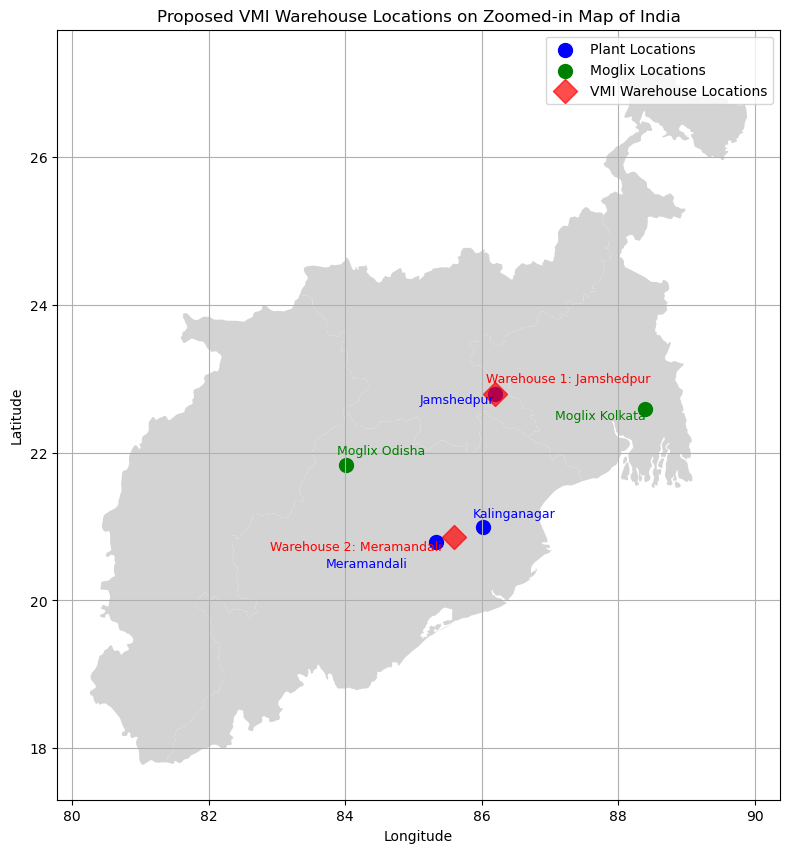

Proposed VMI Warehouse Locations (Latitude, Longitude):
VMI Warehouse 1 (Jamshedpur): 22.78801, 86.19805
VMI Warehouse 2 (Meramandali): 20.86429, 85.60133


In [16]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from adjustText import adjust_text
from scipy.spatial import cKDTree

# Plant locations (latitude and longitude) with names
plant_locations = np.array([
    [20.78551, 85.33628],  # Meramandali
    [20.98810, 86.01783],  # Kalinganagar
    [22.78801, 86.19805],  # Jamshedpur
])
plant_names = ['Meramandali', 'Kalinganagar', 'Jamshedpur']

# Proportions of demand at each location
demand_proportions = np.array([0.22, 0.14, 0.64])  # Meramandali, Kalinganagar, Jamshedpur

# Adjust plant locations by replicating them according to their demand proportions
weighted_plant_locations = np.repeat(plant_locations, (demand_proportions * 100).astype(int), axis=0)

# Number of VMI warehouses you want to establish
num_warehouses = 2  # Adjust based on your analysis

# Apply K-means clustering to find optimal warehouse locations
kmeans = KMeans(n_clusters=num_warehouses, random_state=42, n_init=10)
kmeans.fit(weighted_plant_locations)

# Get the cluster centers (potential VMI warehouse locations)
warehouse_locations = kmeans.cluster_centers_

# Find nearest plant location names for each warehouse location
tree = cKDTree(plant_locations)
_, indices = tree.query(warehouse_locations, k=1)
warehouse_names = [plant_names[i] for i in indices]

# Moglix locations
moglix_locations = np.array([
    [22.5961844, 88.3998444],  # Moglix Kolkata
    [21.8380029, 84.0113736],  # Moglix Odisha
])
moglix_names = ['Moglix Kolkata', 'Moglix Odisha']

# Load the shapefile for India
shapefile_path = 'naturalearth_india_adm1.shp'  # Replace with the correct path to your shapefile

# Ensure the shapefile exists
import os
if not os.path.isfile(shapefile_path):
    raise FileNotFoundError(f"Shapefile not found: {shapefile_path}")

india_map = gpd.read_file(shapefile_path)

# Define bounding box around your points
lat_min, lat_max = min(np.min(plant_locations[:, 0]), np.min(moglix_locations[:, 0])) - 0.5, max(np.max(plant_locations[:, 0]), np.max(moglix_locations[:, 0])) + 0.5
lon_min, lon_max = min(np.min(plant_locations[:, 1]), np.min(moglix_locations[:, 1])) - 0.5, max(np.max(plant_locations[:, 1]), np.max(moglix_locations[:, 1])) + 0.5

# Filter the map to include only the bounding box area
india_map = india_map.cx[lon_min:lon_max, lat_min:lat_max]

# Plot the Indian map with zoomed-in view
fig, ax = plt.subplots(figsize=(10, 10))
india_map.plot(ax=ax, color='lightgrey')

# Plot plant locations
ax.scatter(plant_locations[:, 1], plant_locations[:, 0], color='blue', label='Plant Locations', marker='o', s=100, alpha=1)

# Annotate plant locations
texts = [ax.text(lon, lat, name, fontsize=9, ha='right', color='blue') for name, (lat, lon) in zip(plant_names, plant_locations)]

# Plot Moglix locations
ax.scatter(moglix_locations[:, 1], moglix_locations[:, 0], color='green', label='Moglix Locations', marker='o', s=100, alpha=1)

# Annotate Moglix locations
texts.extend([ax.text(lon, lat, name, fontsize=9, ha='right', color='green') for name, (lat, lon) in zip(moglix_names, moglix_locations)])

# Plot proposed warehouse locations
ax.scatter(warehouse_locations[:, 1], warehouse_locations[:, 0], color='red', label='VMI Warehouse Locations', marker='D', s=150, alpha=0.7)

# Annotate warehouse locations with names
texts.extend([ax.text(lon, lat, f'Warehouse {i + 1}: {name}', fontsize=9, ha='right', color='red') for i, (lat, lon), name in zip(range(num_warehouses), warehouse_locations, warehouse_names)])

# Adjust text to avoid overlap
adjust_text(texts, ax=ax, force_text=0.1, expand_text=(1.05, 1.1))

plt.title('Proposed VMI Warehouse Locations on Zoomed-in Map of India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

# Display warehouse coordinates and names
print("Proposed VMI Warehouse Locations (Latitude, Longitude):")
for i, (loc, name) in enumerate(zip(warehouse_locations, warehouse_names)):
    print(f"VMI Warehouse {i + 1} ({name}): {loc[0]:.5f}, {loc[1]:.5f}")


## Safety Stock Analysis

In [17]:
import pandas as pd
import numpy as np

# Load the Excel file
data = pd.read_excel('Analysis.xlsx')

# Convert order dates to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Calculate weekly demand (total quantity per item per week)
data['Week'] = data['Order Date'].dt.isocalendar().week
weekly_demand = data.groupby(['Item Code', 'Week'])['Order Quantity'].sum().reset_index()

# Calculate mean and standard deviation of weekly demand per item
demand_stats = weekly_demand.groupby('Item Code')['Order Quantity'].agg(['mean', 'std']).reset_index()
demand_stats.columns = ['Item Code', 'Mean Weekly Demand', 'Std Weekly Demand']

# Assumptions
Z = 2.33  # Z-score for 99% service level
L = 2  # Lead time in weeks (14 days)

# Calculate Safety Stock
demand_stats['Safety Stock'] = Z * demand_stats['Std Weekly Demand'] * np.sqrt(L)

# Save the DataFrame to an Excel file
output_file = 'Safety_Stock_Calculation.xlsx'
demand_stats.to_excel(output_file, index=False)

print(f'Safety stock data saved to {output_file}')

Safety stock data saved to Safety_Stock_Calculation.xlsx


In [18]:
demand_stats

,Item Code,Mean Weekly Demand,Std Weekly Demand,Safety Stock
0,0008A0049,15.000000,NaN,NaN
1,0008A0051,2.000000,NaN,NaN
2,0008A0098,9.100000,3.381321,11.141851
3,0008A0133,28.666667,28.842099,95.038108
4,0008A0141,21.500000,16.901676,55.693012
...,...,...,...,...
4962,6158A0114,322.500000,314.662518,1036.850000
4963,6158A0115,1100.500000,990.656600,3264.330000
4964,6158A0566,2.000000,NaN,NaN
4965,6200Y0003,17.333333,6.429101,21.184642


In [19]:
demand_stats.isnull().sum()

Item Code                0
Mean Weekly Demand       0
Std Weekly Demand     1687
Safety Stock          1687
dtype: int64

In [20]:
data

,Order Date,Item Code,Short Desc of Item,Order Quantity,Order Unit,Location,Week
0,2023-07-31,0008A0049,"""BRG.BALL,SINGLE ROW,DEEP GROOVE,6203""",15.0,NOS,Jamshedpur,31
1,2023-04-05,0008A0051,"""BRG.BALL,6205/61903 HLU""",2.0,NOS,Jamshedpur,14
2,2023-04-05,0008A0098,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",9.0,NOS,Jamshedpur,14
3,2023-07-05,0008A0098,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",5.0,NOS,Jamshedpur,27
4,2023-10-06,0008A0098,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",5.0,NOS,Jamshedpur,40
...,...,...,...,...,...,...,...
21670,2023-08-22,6200Y0003,PORTABLE GRINDING MA;ELECTRIC POWER ANG,20.0,NOS,Meramandali,34
21671,2023-11-28,6200Y0003,PORTABLE GRINDING MA;ELECTRIC POWER ANG,22.0,NOS,Meramandali,48
21672,2023-06-20,6200Y0004,PORTABLE GRINDING MA;ELECTRIC POWER ANG,20.0,NOS,Meramandali,25
21673,2023-08-22,6200Y0004,PORTABLE GRINDING MA;ELECTRIC POWER ANG,35.0,NOS,Meramandali,34


In [21]:
weekly_demand

,Item Code,Week,Order Quantity
0,0008A0049,31,15.0
1,0008A0051,14,2.0
2,0008A0098,1,15.0
3,0008A0098,10,14.0
4,0008A0098,13,6.0
...,...,...,...
18662,6200Y0003,34,20.0
18663,6200Y0003,48,22.0
18664,6200Y0004,25,20.0
18665,6200Y0004,34,35.0


## Consumption Trend Analysis

<Figure size 1000x600 with 0 Axes>

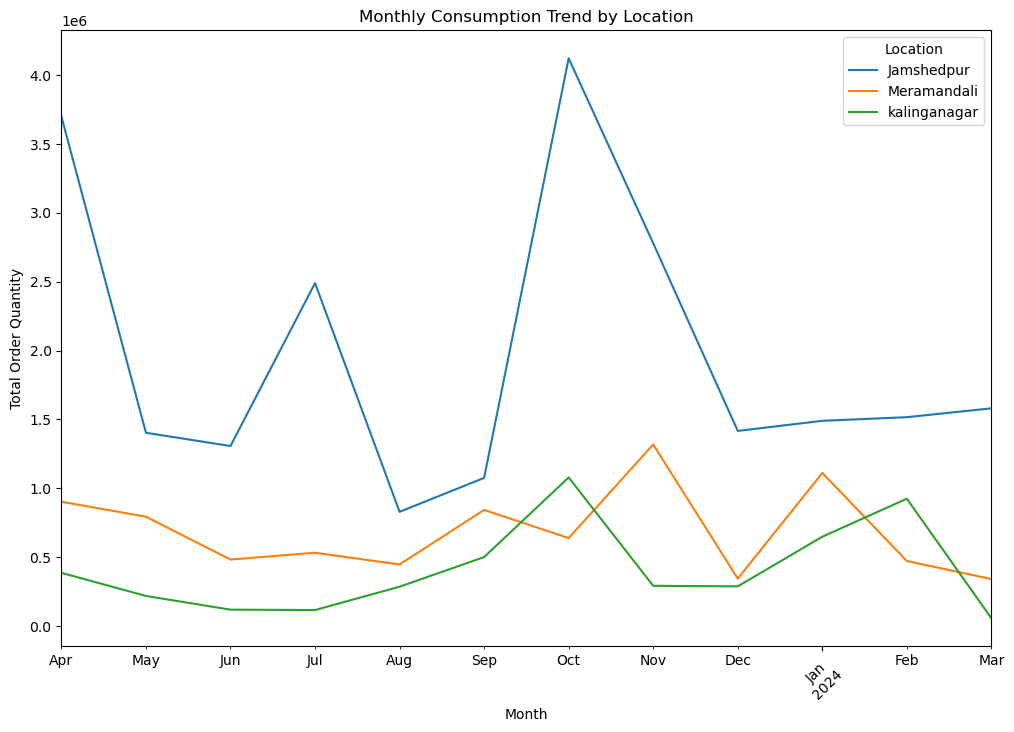

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month and location, then calculate total order quantity
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_trend_location = df.groupby(['Month', 'Location'])['Order Quantity'].sum().unstack()

# Plot the trend for each location
plt.figure(figsize=(10,6))
monthly_trend_location.plot(kind='line', figsize=(12,8))
plt.title('Monthly Consumption Trend by Location')
plt.xlabel('Month')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.show()

In [23]:
monthly_trend_location

Location,Jamshedpur,Meramandali,kalinganagar
Month,,,
2023-04,3699323.280,903023.00,386654.140
2023-05,1403390.000,793939.00,218867.020
2023-06,1307452.270,483258.00,119336.200
2023-07,2490300.200,532558.65,116643.480
2023-08,829590.960,447424.00,285890.176
2023-09,1075986.970,843399.00,501214.776
2023-10,4122374.558,638981.70,1079018.470
2023-11,2779190.215,1318336.00,292545.980
2023-12,1416953.254,344755.00,288503.960


In [24]:
import pandas as pd

# Filter data for Jamshedpur and the month of October
df['Month'] = df['Order Date'].dt.to_period('M')  # Ensure 'Month' is in the correct format
october_jamshedpur = df[(df['Location'] == 'Jamshedpur') & (df['Month'] == '2023-10')]

# Group by product (or 'Item Code' or 'Short Desc of Item') and calculate total order quantity
october_peak_products = october_jamshedpur.groupby('Item Code')['Order Quantity'].sum().sort_values(ascending=False)

# Display top contributing products
print(october_peak_products.head(10))  # Show top 10 products contributing to the peak


Item Code
0954A0012    566050.0
0929A0017    411363.0
0954A0009    410227.0
5786A0033    270000.0
0168A0029    164850.0
0435A0004    153000.0
0279A0001    113893.0
5758A0002    113152.0
6024A0006    105040.0
5758A0003    101428.0
Name: Order Quantity, dtype: float64


Item Code     0168A0029  0279A0001  0435A0004  0929A0017  0954A0009  \
Location                                                              
Jamshedpur     576345.0   253410.0  1213260.0  1223213.0  1270287.0   
Meramandali         NaN        NaN        NaN        NaN        NaN   
kalinganagar     1680.0        NaN        NaN   451147.0   153859.0   

Item Code     0954A0012  5758A0002  5758A0003  5786A0033  6024A0006  
Location                                                             
Jamshedpur    2245899.0   146716.0   120114.0   739208.0   570141.2  
Meramandali         NaN        NaN        NaN    14100.0        NaN  
kalinganagar   592375.0   132000.0    76000.0    17000.0    10115.0  


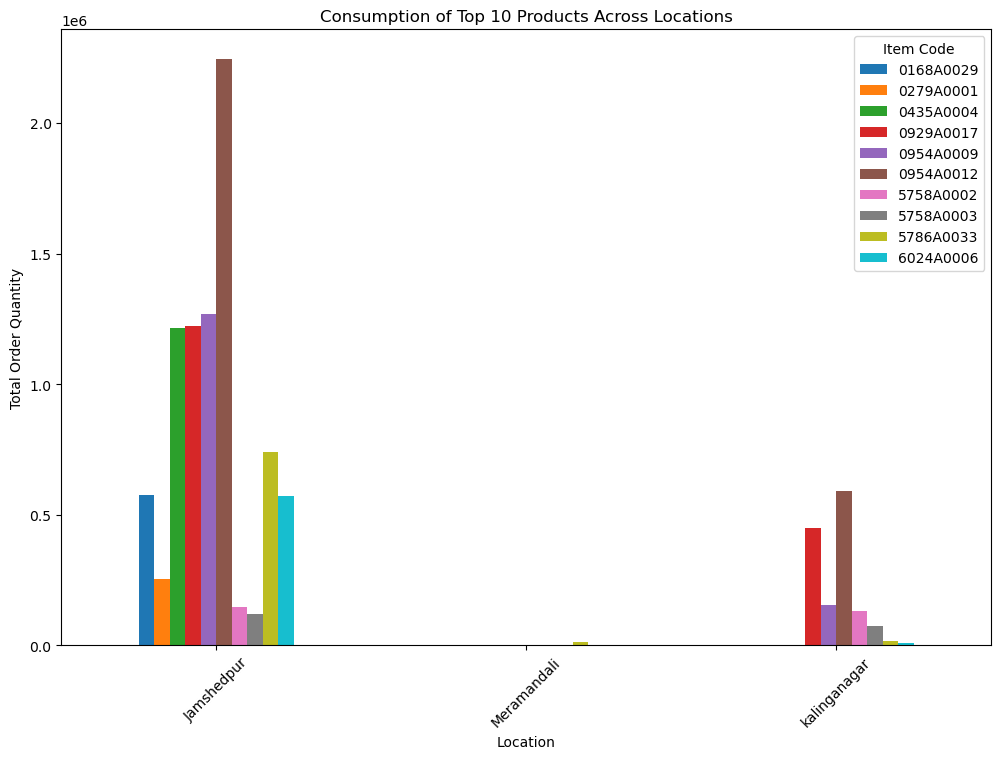

In [25]:
import pandas as pd

# Step 1: Filter data for Jamshedpur in October and get the top 10 products
df['Month'] = df['Order Date'].dt.to_period('M')  # Ensure 'Month' is in the correct format
october_jamshedpur = df[(df['Location'] == 'Jamshedpur') & (df['Month'] == '2023-10')]

# Group by product and calculate total order quantity
top_10_products = october_jamshedpur.groupby('Item Code')['Order Quantity'].sum().nlargest(10).index

# Step 2: Filter the entire dataset for these top 10 products
top_10_products_data = df[df['Item Code'].isin(top_10_products)]

# Step 3: Group the data by plant location and product
location_comparison = top_10_products_data.groupby(['Location', 'Item Code'])['Order Quantity'].sum().unstack()

# Display the consumption of top 10 products across all locations
print(location_comparison)

# Optional: Plot the consumption of top 10 products across the three locations
location_comparison.plot(kind='bar', figsize=(12,8))
plt.title('Consumption of Top 10 Products Across Locations')
plt.xlabel('Location')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.legend(title='Item Code')
plt.show()


Short Desc of Item       BAR SOAP  CBL TIE;NYLON,188MM,4.8MM  \
Location     Item Code                                         
Jamshedpur   0168A0029        NaN                        NaN   
             0279A0001        NaN                        NaN   
             0435A0004  1213260.0                        NaN   
             0929A0017        NaN                        NaN   
             0954A0009        NaN                        NaN   
             0954A0012        NaN                        NaN   
             5758A0002        NaN                   146716.0   
             5758A0003        NaN                        NaN   
             5786A0033        NaN                        NaN   
             6024A0006        NaN                        NaN   
Meramandali  5786A0033        NaN                        NaN   
kalinganagar 0168A0029        NaN                        NaN   
             0929A0017        NaN                        NaN   
             0954A0009        NaN       

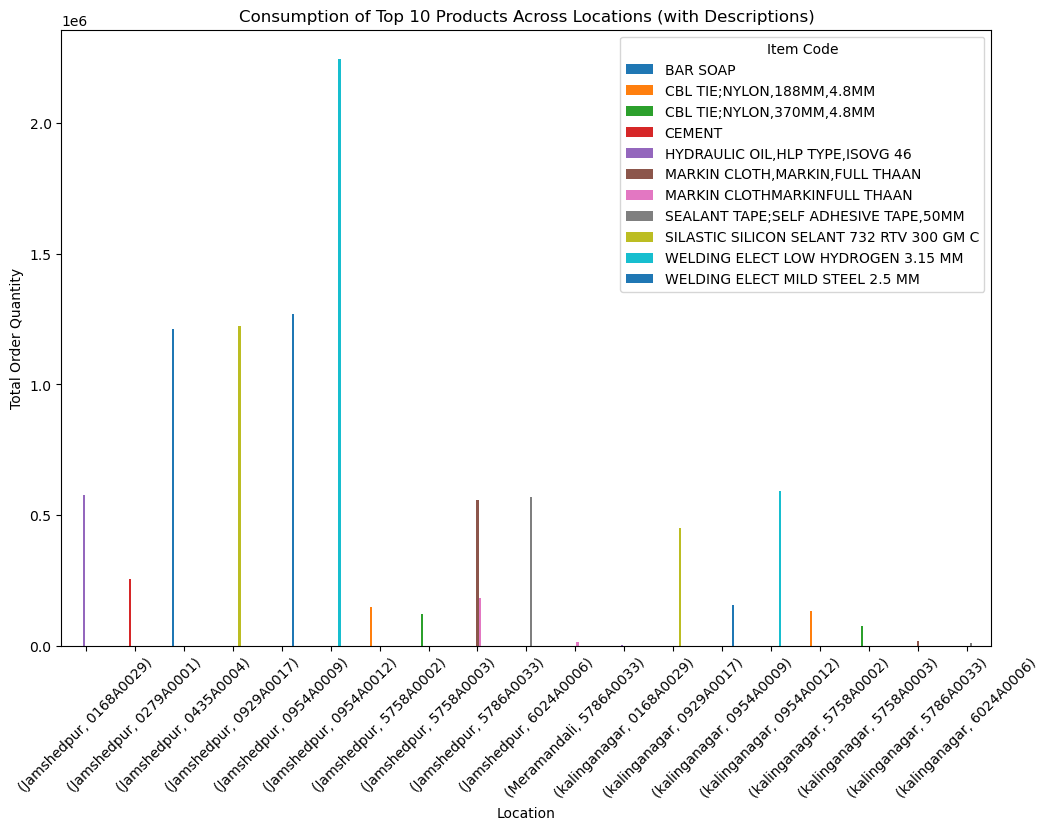

In [26]:
import pandas as pd

# Step 1: Filter data for Jamshedpur in October and get the top 10 products
df['Month'] = df['Order Date'].dt.to_period('M')  # Ensure 'Month' is in the correct format
october_jamshedpur = df[(df['Location'] == 'Jamshedpur') & (df['Month'] == '2023-10')]

# Group by product and get total order quantity
top_10_products = october_jamshedpur.groupby(['Item Code', 'Short Desc of Item'])['Order Quantity'].sum().nlargest(10)

# Step 2: Filter the entire dataset for these top 10 products
top_10_item_codes = top_10_products.index.get_level_values('Item Code')
top_10_products_data = df[df['Item Code'].isin(top_10_item_codes)]

# Step 3: Group the data by plant location, item code, and product description
location_comparison = top_10_products_data.groupby(['Location', 'Item Code', 'Short Desc of Item'])['Order Quantity'].sum().unstack()

# Display the consumption of top 10 products (with descriptions) across all locations
print(location_comparison)

# Optional: Plot the consumption of top 10 products across the three locations
location_comparison.plot(kind='bar', figsize=(12,8))
plt.title('Consumption of Top 10 Products Across Locations (with Descriptions)')
plt.xlabel('Location')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.legend(title='Item Code')
plt.show()


## Kalinganagar Forecast for each SKU

In [27]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with relevant columns

# Step 1: Filter data for Kalinganagar location
kalinganagar_data = df[df['Location'] == 'kalinganagar']

# Step 2: Calculate current annual consumption for each SKU at Kalinganagar
current_sku_consumption = kalinganagar_data.groupby('Item Code')['Order Quantity'].sum()

# Step 3: Determine current production capacity and capacity increase
current_capacity = 3  # Example: current capacity is 6 MTPA
capacity_increase = 8  # Example: capacity increase is 5 MTPA

# Calculate percentage increase in capacity
capacity_increase_percentage = (capacity_increase / current_capacity) * 100

# Step 4: Project future consumption for each SKU based on capacity increase
projected_sku_consumption = current_sku_consumption * (1 + capacity_increase / current_capacity)

# Step 5: Adjust for the first-year ramp-up (assuming 70% utilization in the first year)
ramp_up_factor = 0.7
projected_first_year_sku_consumption = projected_sku_consumption * ramp_up_factor

# Step 6: Create a DataFrame to display the results
projection_df = pd.DataFrame({
    'Current Consumption': current_sku_consumption,
    'Projected Consumption (Full Capacity)': projected_sku_consumption,
    'Projected Consumption (First Year - 70% Utilization)': projected_first_year_sku_consumption
})

# Display the projection for each SKU
projection_df


,Current Consumption,Projected Consumption (Full Capacity),Projected Consumption (First Year - 70% Utilization)
Item Code,,,
0071A0001,67.0,245.666667,171.966667
0071A0013,20.0,73.333333,51.333333
0074A0002,6.0,22.000000,15.400000
0077A0010,100.0,366.666667,256.666667
0077A0013,50.0,183.333333,128.333333
...,...,...,...
6093A0035,250.0,916.666667,641.666667
6093A0041,789.0,2893.000000,2025.100000
6093A0042,491.0,1800.333333,1260.233333


In [28]:
df.head()

,Order Date,Item Code,Short Desc of Item,Order Quantity,Order Unit,Location,Month
0,2023-07-31,0008A0049,"""BRG.BALL,SINGLE ROW,DEEP GROOVE,6203""",15.0,NOS,Jamshedpur,2023-07
1,2023-04-05,0008A0051,"""BRG.BALL,6205/61903 HLU""",2.0,NOS,Jamshedpur,2023-04
2,2023-04-05,0008A0098,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",9.0,NOS,Jamshedpur,2023-04
3,2023-07-05,0008A0098,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",5.0,NOS,Jamshedpur,2023-07
4,2023-10-06,0008A0098,"""BRG.BALL,SINGLE ROW,DEEP GRO,MET. 6309""",5.0,NOS,Jamshedpur,2023-10


/var/folders/xg/l0pzd1q11n35y5zh_2zxvz1r0000gn/T/ipykernel_93702/854144419.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



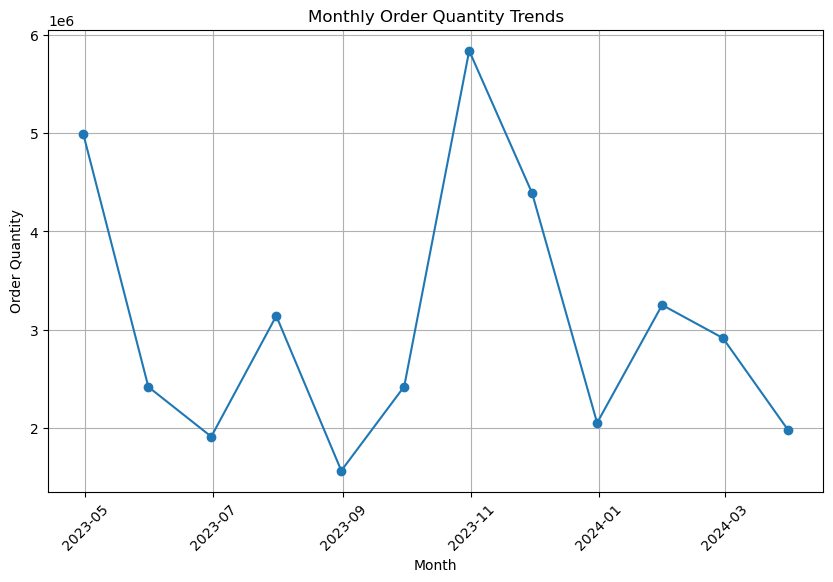

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Order Date' to datetime format for time-based analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Monthly trends in order quantity
monthly_trends = df.resample('M', on='Order Date')['Order Quantity'].sum()

# Plot the monthly order quantity trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', linestyle='-')
plt.title('Monthly Order Quantity Trends')
plt.xlabel('Month')
plt.ylabel('Order Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/xg/l0pzd1q11n35y5zh_2zxvz1r0000gn/T/ipykernel_93702/2993881007.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



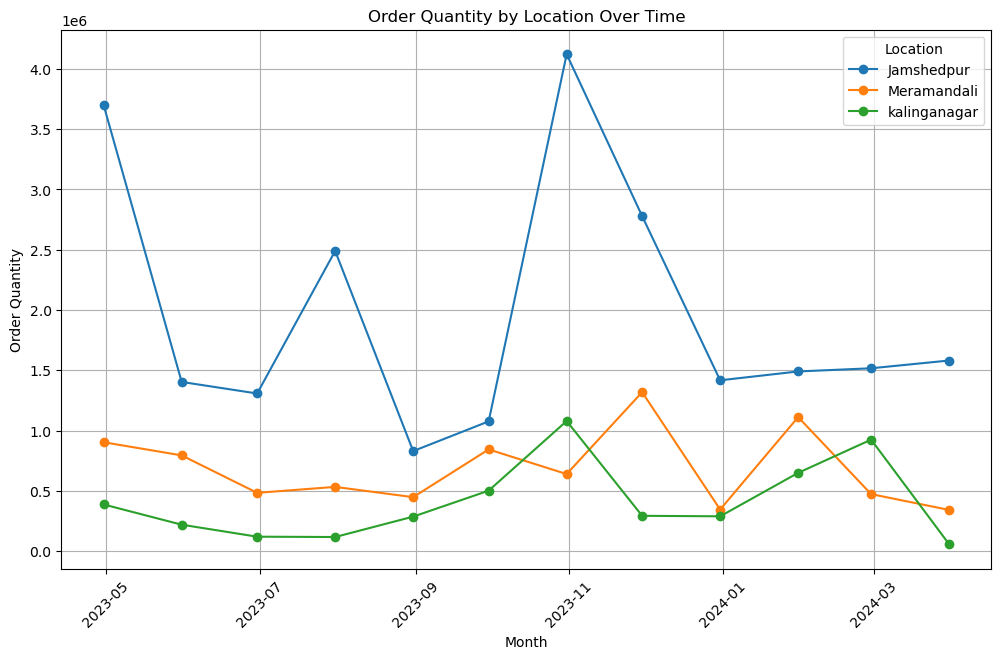

In [35]:
# Order quantity by location over time
location_trends = df.groupby([pd.Grouper(key='Order Date', freq='M'), 'Location'])['Order Quantity'].sum().unstack()

# Plot the order quantity by location over time
plt.figure(figsize=(12, 7))
for location in location_trends.columns:
    plt.plot(location_trends.index, location_trends[location], marker='o', linestyle='-', label=location)

plt.title('Order Quantity by Location Over Time')
plt.xlabel('Month')
plt.ylabel('Order Quantity')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.grid(True)
plt.show()

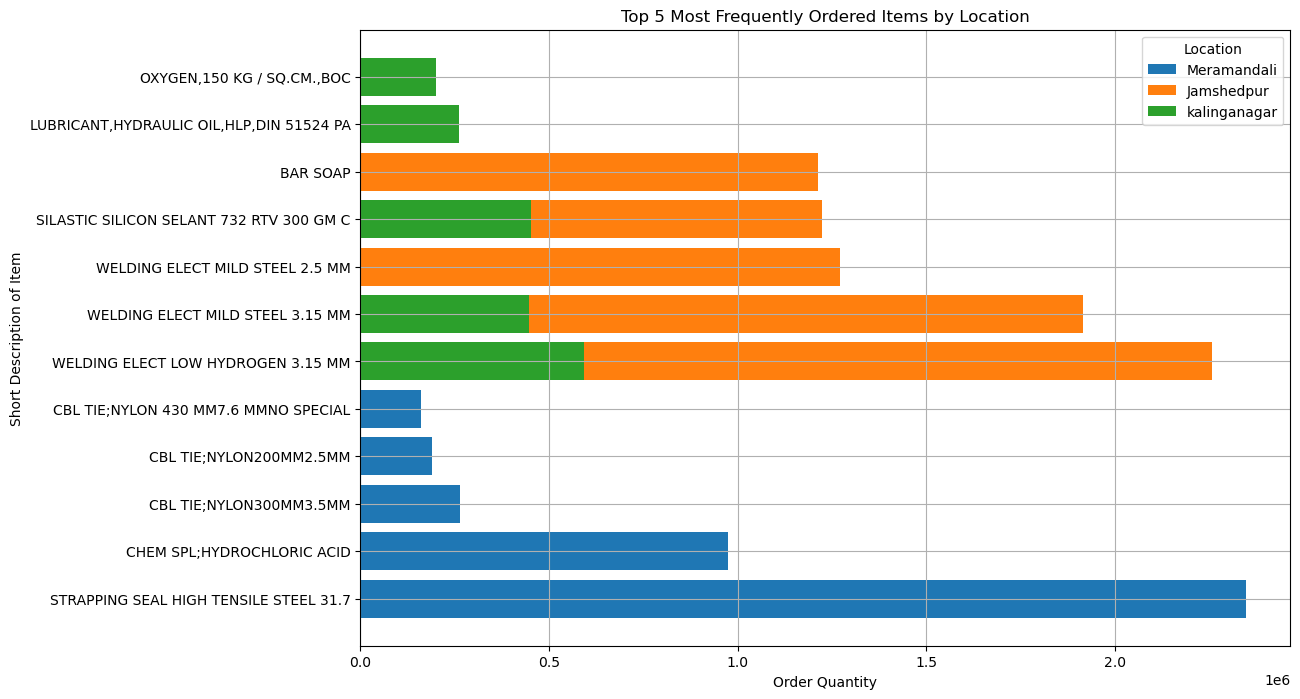

In [36]:
# Most frequently ordered items by location
top_items_by_location = df.groupby(['Location', 'Short Desc of Item'])['Order Quantity'].sum().sort_values(ascending=False).groupby(level=0).head(5).reset_index()

# Plot the top items by location
plt.figure(figsize=(12, 8))
for location in top_items_by_location['Location'].unique():
    location_data = top_items_by_location[top_items_by_location['Location'] == location]
    plt.barh(location_data['Short Desc of Item'], location_data['Order Quantity'], label=location)

plt.title('Top 5 Most Frequently Ordered Items by Location')
plt.xlabel('Order Quantity')
plt.ylabel('Short Description of Item')
plt.legend(title='Location')
plt.grid(True)
plt.show()

/var/folders/xg/l0pzd1q11n35y5zh_2zxvz1r0000gn/T/ipykernel_93702/1593732815.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



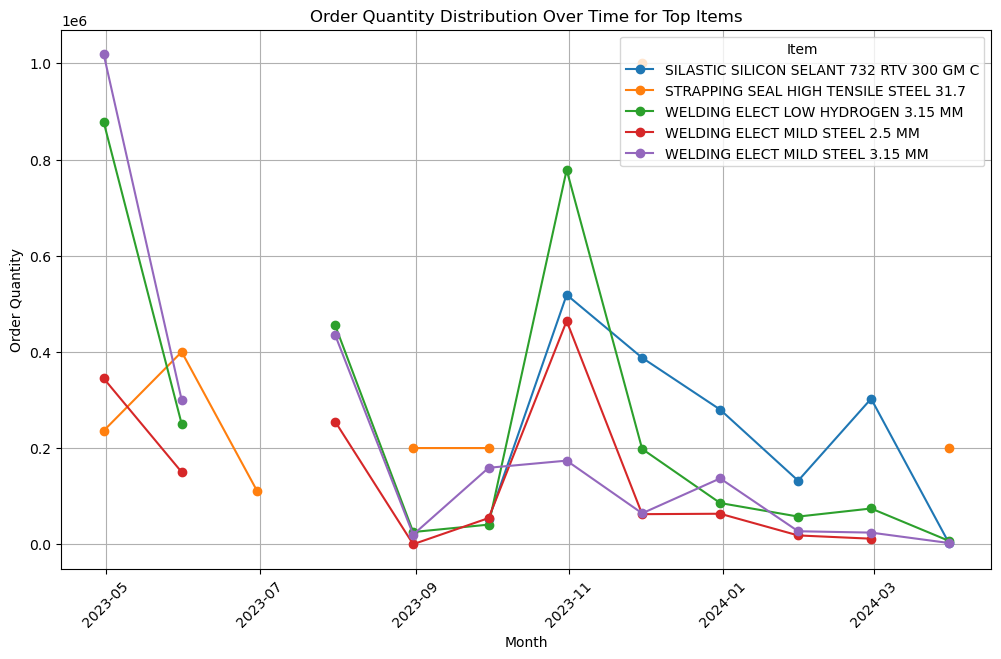

In [37]:
# Aggregated order quantity by item to identify top items
order_quantity_by_item = df.groupby('Short Desc of Item')['Order Quantity'].sum().sort_values(ascending=False)

# Top items to analyze
top_items = order_quantity_by_item.index[:5]

# Order quantity distribution over time for top items
top_items_trends = df[df['Short Desc of Item'].isin(top_items)].groupby([pd.Grouper(key='Order Date', freq='M'), 'Short Desc of Item'])['Order Quantity'].sum().unstack()

# Plot the order quantity distribution over time for top items
plt.figure(figsize=(12, 7))
for item in top_items_trends.columns:
    plt.plot(top_items_trends.index, top_items_trends[item], marker='o', linestyle='-', label=item)

plt.title('Order Quantity Distribution Over Time for Top Items')
plt.xlabel('Month')
plt.ylabel('Order Quantity')
plt.xticks(rotation=45)
plt.legend(title='Item')
plt.grid(True)
plt.show()

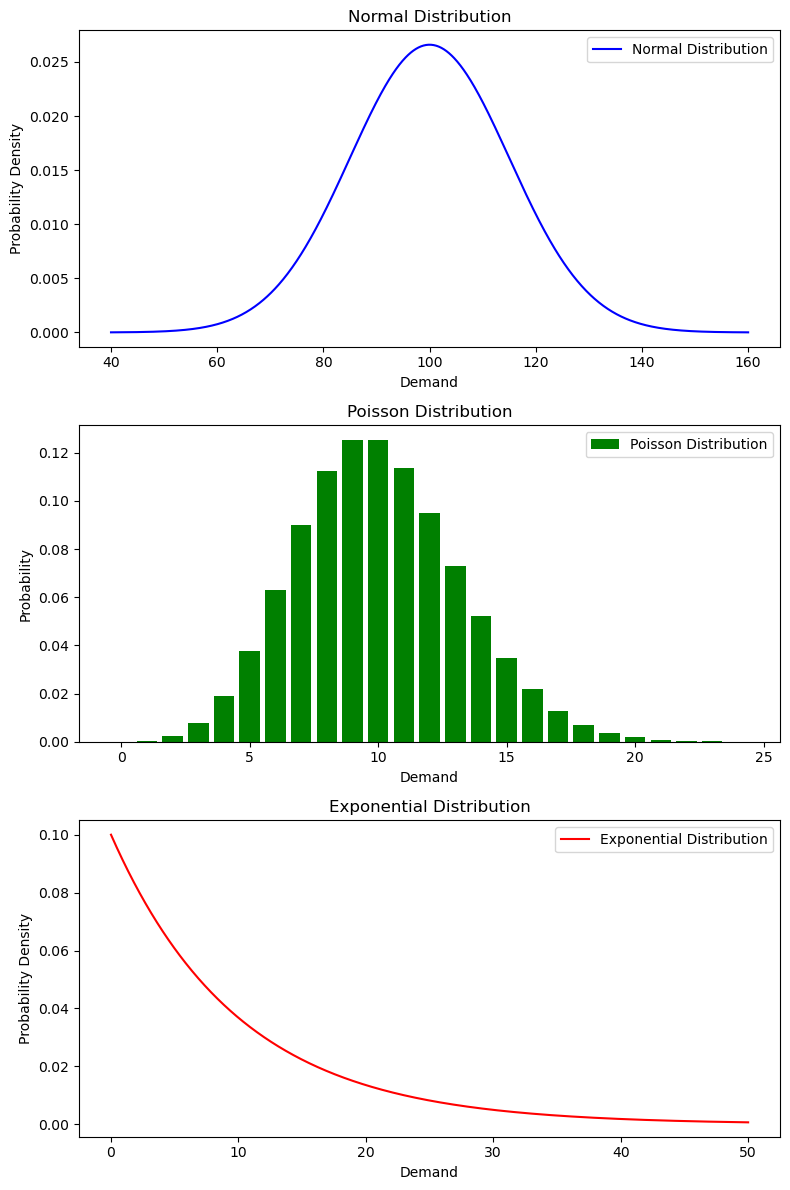

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the parameters
mean_normal = 100
stddev_normal = 15
lambda_poisson = 10
lambda_exponential = 0.1

# Generate sample data for each distribution
x_normal = np.linspace(mean_normal - 4*stddev_normal, mean_normal + 4*stddev_normal, 1000)
y_normal = stats.norm.pdf(x_normal, mean_normal, stddev_normal)

x_poisson = np.arange(0, 25, 1)
y_poisson = stats.poisson.pmf(x_poisson, lambda_poisson)

x_exponential = np.linspace(0, 50, 1000)
y_exponential = stats.expon.pdf(x_exponential, scale=1/lambda_exponential)

# Create plots for each distribution
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Normal distribution
axes[0].plot(x_normal, y_normal, label='Normal Distribution', color='blue')
axes[0].set_title('Normal Distribution')
axes[0].set_xlabel('Demand')
axes[0].set_ylabel('Probability Density')
axes[0].legend()

# Poisson distribution
axes[1].bar(x_poisson, y_poisson, label='Poisson Distribution', color='green')
axes[1].set_title('Poisson Distribution')
axes[1].set_xlabel('Demand')
axes[1].set_ylabel('Probability')
axes[1].legend()

# Exponential distribution
axes[2].plot(x_exponential, y_exponential, label='Exponential Distribution', color='red')
axes[2].set_title('Exponential Distribution')
axes[2].set_xlabel('Demand')
axes[2].set_ylabel('Probability Density')
axes[2].legend()

plt.tight_layout()
plt.show()

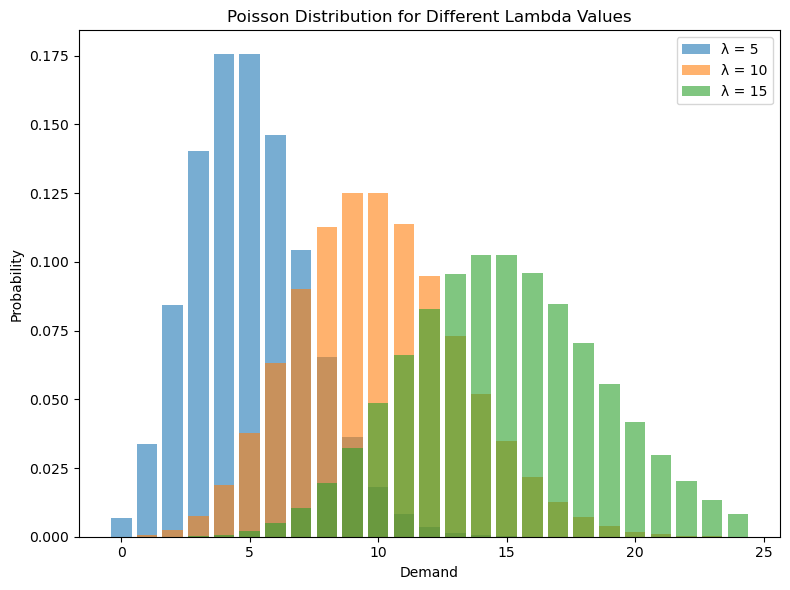

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Lambda values
lambdas = [5, 10, 15]

# Generate the x-values (discrete demand values) for Poisson distribution
x_poisson = np.arange(0, 25, 1)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot Poisson distributions for each lambda value
for lam in lambdas:
    y_poisson = stats.poisson.pmf(x_poisson, lam)
    plt.bar(x_poisson, y_poisson, label=f'λ = {lam}', alpha=0.6)

# Add titles and labels
plt.title('Poisson Distribution for Different Lambda Values')
plt.xlabel('Demand')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()